In [10]:
# Install SQLite3 (comes built in with python)
import sqlite3

# Install Panas for data analysis
import pandas as pd

# Install Seaborn & Matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This method hides any warnings in your Jupyter Notebook.
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Connect to SQLite database (creates a new file if it doesn't exist)
conn = sqlite3.connect("customer_data.db")

# Create a cursor to interact with the database
cursor = conn.cursor()

# Create a sample table
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT,
age INTERGER,
city TEXT,
total_spent_ REAL
)
""")

# Commit and close connection
conn.commit()


In [14]:
# Sample data to insert
customers=[
("Alice Johnson", 28, "New York", 500.75),
("Bob Smith", 35, "Los Angeles", 1200.50),
("Charlie Brown", 22, "Chicago", 330.40),
("David White", 40, "Houston", 980.90),
("Emma Wilson", 31, "San Francisco", 700.60)
]

# Insert data into table
cursor.executemany("INSERT INTO customers (name, age, city, total_spent) VALUES (?, ?, ?, ?)", customers)

# Commit changes
conn.commit()

In [16]:
# Run a SQL query to retrieve all customer data
query = "SELECT * FROM customers"
df = pd.read_sql(query, conn)  # Store query results in a Pandas DataFrame

# Display the data
df.head()

,id,name,age,city,total_spent_,total_spent
0,1,Alice Johnson,28,New York,None,NaN
1,2,Bob Smith,35,Los Angeles,None,NaN
2,3,Charlie Brown,22,Chicago,None,NaN
3,4,David White,40,Houston,None,NaN
4,5,Emma Wilson,31,San Francisco,None,NaN


In [18]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    name TEXT,
    age INTEGER,
    city TEXT,
    total_spent REAL
)
""")
conn.commit()


In [20]:
# Remove total_spent from both data and SQL
customers = [
    ("Alice Johnson", 28, "New York"),
    ("Bob Smith", 35, "Los Angeles"),
    ("Charlie Brown", 22, "Chicago"),
    ("David White", 40, "Houston"),
    ("Emma Wilson", 31, "San Francisco")
]

cursor.executemany("INSERT INTO customers (name, age, city) VALUES (?, ?, ?)", customers)
conn.commit()


In [22]:
cursor.execute("SELECT * FROM customers")
rows = cursor.fetchall()

for row in rows:
    print(row)


(1, 'Alice Johnson', 28, 'New York', None, None)
(2, 'Bob Smith', 35, 'Los Angeles', None, None)
(3, 'Charlie Brown', 22, 'Chicago', None, None)
(4, 'David White', 40, 'Houston', None, None)
(5, 'Emma Wilson', 31, 'San Francisco', None, None)
(6, 'Alice Johnson', 28, 'New York', None, 500.75)
(7, 'Bob Smith', 35, 'Los Angeles', None, 1200.5)
(8, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(9, 'David White', 40, 'Houston', None, 980.9)
(10, 'Emma Wilson', 31, 'San Francisco', None, 700.6)
(11, 'Alice Johnson', 28, 'New York', None, 500.75)
(12, 'Bob Smith', 35, 'Los Angeles', None, 1200.5)
(13, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(14, 'David White', 40, 'Houston', None, 980.9)
(15, 'Emma Wilson', 31, 'San Francisco', None, 700.6)
(16, 'Alice Johnson', 28, 'New York', None, 500.75)
(17, 'Bob Smith', 35, 'Los Angeles', None, 1200.5)
(18, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(19, 'David White', 40, 'Houston', None, 980.9)
(20, 'Emma Wilson', 31, 'San Francisco', None, 700

In [24]:
cursor.execute("SELECT * FROM customers WHERE total_spent < 500")
rows = cursor.fetchall()

for row in rows:
    print(row)


(8, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(13, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(18, 'Charlie Brown', 22, 'Chicago', None, 330.4)
(23, 'Charlie Brown', 22, 'Chicago', None, 330.4)


In [26]:
cursor.execute("SELECT AVG(age) FROM customers")
average_age = cursor.fetchone()[0]
print("Average Age:", average_age)


Average Age: 31.2


In [28]:
cursor.execute("SELECT SUM(total_spent) FROM customers")
total_spent_sum = cursor.fetchone()[0]
print("Total Spent:", total_spent_sum)


Total Spent: 14852.6


In [30]:
cursor.execute("SELECT city, SUM(total_spent) FROM customers GROUP BY city")
rows = cursor.fetchall()

for row in rows:
    print(f"City: {row[0]}, Total Spent: {row[1]}")


City: Chicago, Total Spent: 1321.6
City: Houston, Total Spent: 3923.6
City: Los Angeles, Total Spent: 4802.0
City: New York, Total Spent: 2003.0
City: San Francisco, Total Spent: 2802.4


In [32]:
cursor.execute("SELECT city, COUNT(*) FROM customers GROUP BY city")
rows = cursor.fetchall()

for row in rows:
    print(f"City: {row[0]}, Number of Customers: {row[1]}")


City: Chicago, Number of Customers: 6
City: Houston, Number of Customers: 6
City: Los Angeles, Number of Customers: 6
City: New York, Number of Customers: 6
City: San Francisco, Number of Customers: 6


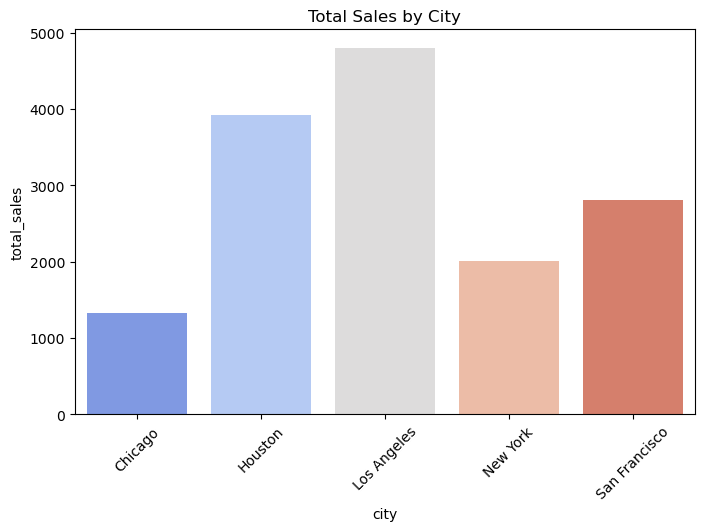

In [34]:
# Run SQL query and store results in DataFrame
query = "SELECT city, SUM(total_spent) AS total_sales FROM customers GROUP BY city"
df_sales = pd.read_sql(query, conn)

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x="city", y="total_sales", data=df_sales, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Sales by City")
plt.show()

In [36]:
conn.close()